In [13]:
library(readr)
library(GRaNIE)
options(digits=5, max.print=100)  # Adjust numbers as needed


In [5]:
# We load the example data directly from the web:
file_peaks = "https://www.embl.de/download/zaugg/GRaNIE/countsATAC.filtered.tsv.gz"
file_RNA = "https://www.embl.de/download/zaugg/GRaNIE/countsRNA.filtered.tsv.gz"
file_sampleMetadata = "https://www.embl.de/download/zaugg/GRaNIE/sampleMetadata.tsv.gz"

countsRNA.df = read_tsv(file_RNA, col_types = cols())
countsPeaks.df = read_tsv(file_peaks, col_types = cols())
sampleMetadata.df = read_tsv(file_sampleMetadata, col_types = cols())


# Let's check how the data looks like
countsRNA.df
countsPeaks.df
sampleMetadata.df

# Save the name of the respective ID columns
idColumn_peaks = "peakID"
idColumn_RNA = "ENSEMBL"

In [17]:
# sampleMetadata.df

In [18]:
genomeAssembly = "hg38"  #Either hg19, hg38 or mm10. Both enhancers and RNA data must have the same genome assembly

# Optional and arbitrary list with information and metadata that is stored
# within the GRaNIE object
objectMetadata.l = list(name = paste0("Macrophages_infected_primed"), file_peaks = file_peaks,
    file_rna = file_RNA, file_sampleMetadata = file_sampleMetadata, genomeAssembly = genomeAssembly)

dir_output = "."

GRN = initializeGRN(objectMetadata = objectMetadata.l, outputFolder = dir_output,
    genomeAssembly = genomeAssembly)

GRN

INFO [2024-01-22 15:35:40] Empty GRN object created successfully. Type the object name (e.g., GRN) to retrieve summary information about it at any time.
INFO [2024-01-22 15:35:40]  Default output folder: /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/
INFO [2024-01-22 15:35:40]  Genome assembly: hg38
INFO [2024-01-22 15:35:40] Finished successfully. Execution time: 0 secs


GRN object from package GRaNIE (created with version 1.6.1)
Data summary:
 Peaks: No peak data found.
 Genes: No RNA-seq data found.
 TFs: No TF data found.
Parameters:
 Output directory:  /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/ 
Provided metadata:
  name :  Macrophages_infected_primed 
  file_peaks :  https://www.embl.de/download/zaugg/GRaNIE/countsATAC.filtered.tsv.gz 
  file_rna :  https://www.embl.de/download/zaugg/GRaNIE/countsRNA.filtered.tsv.gz 
  file_sampleMetadata :  https://www.embl.de/download/zaugg/GRaNIE/sampleMetadata.tsv.gz 
  genomeAssembly :  hg38 
Connections:
 TF-peak links: none found
 peak-gene links: none found
 TF-peak-gene links (filtered): none found
Network-related:
  eGRN network: not found

In [19]:
GRN = addData(GRN, counts_peaks = countsPeaks.df, normalization_peaks = "DESeq2_sizeFactors",
    idColumn_peaks = idColumn_peaks, counts_rna = countsRNA.df, normalization_rna = "limma_quantile",
    idColumn_RNA = idColumn_RNA, sampleMetadata = sampleMetadata.df, forceRerun = TRUE)

GRN

INFO [2024-01-22 15:35:54]  Normalizing data using the package DESeq2 with a standard size factor normalization.
INFO [2024-01-22 15:35:55]  Normalizing data using the package limma with the following method: limma_quantile
INFO [2024-01-22 15:35:56] Parsing provided metadata...
INFO [2024-01-22 15:35:56] Subset RNA and peaks and keep only shared samples
INFO [2024-01-22 15:35:56]  Number of samples for RNA before filtering: 29
INFO [2024-01-22 15:35:56]  Number of samples for peaks before filtering: 31
INFO [2024-01-22 15:35:56]  29 samples (babk_D,bima_D,cicb_D,coyi_D,diku_D,eipl_D,eiwy_D,eofe_D,fafq_D,febc_D,fikt_D,guss_D,hayt_D,hehd_D,heja_D,hiaf_D,iill_D,kuxp_D,nukw_D,oapg_D,oevr_D,pamv_D,pelm_D,podx_D,qolg_D,sojd_D,vass_D,xugn_D,zaui_D) are shared between the peaks and RNA-Seq data
WARN [2024-01-22 15:35:56] The following samples from the peaks will be ignored for the classification due to missing overlap with RNA-Seq: uaqe_D,qaqx_D
INFO [2024-01-22 15:35:56]  Number of samples f

loading from cache



INFO [2024-01-22 15:36:31] Finished successfully. Execution time: 37.2 secs


GRN object from package GRaNIE (created with version 1.6.1)
Data summary:
 Peaks (filtered, all): 60698, 60698
 Genes (filtered, all): 18972, 18972
 Shared samples: 29
 TFs: No TF data found.
Parameters:
 Output directory:  /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/ 
Provided metadata:
  name :  Macrophages_infected_primed 
  file_peaks :  https://www.embl.de/download/zaugg/GRaNIE/countsATAC.filtered.tsv.gz 
  file_rna :  https://www.embl.de/download/zaugg/GRaNIE/countsRNA.filtered.tsv.gz 
  file_sampleMetadata :  https://www.embl.de/download/zaugg/GRaNIE/sampleMetadata.tsv.gz 
  genomeAssembly :  hg38 
Connections:
 TF-peak links: none found
 peak-gene links: none found
 TF-peak-gene links (filtered): none found
Network-related:
  eGRN network: not found

INFO [2024-01-22 15:39:59] Plotting PCA and metadata correlation of normalized RNA data for all shared samples. This may take a few minutes
INFO [2024-01-22 15:39:59] Prepare PCA. Count transformation: none
INFO [2024-01-22 15:39:59] Plotting directly
INFO [2024-01-22 15:39:59]   Performing and summarizing PCs across metadata for top 500 features


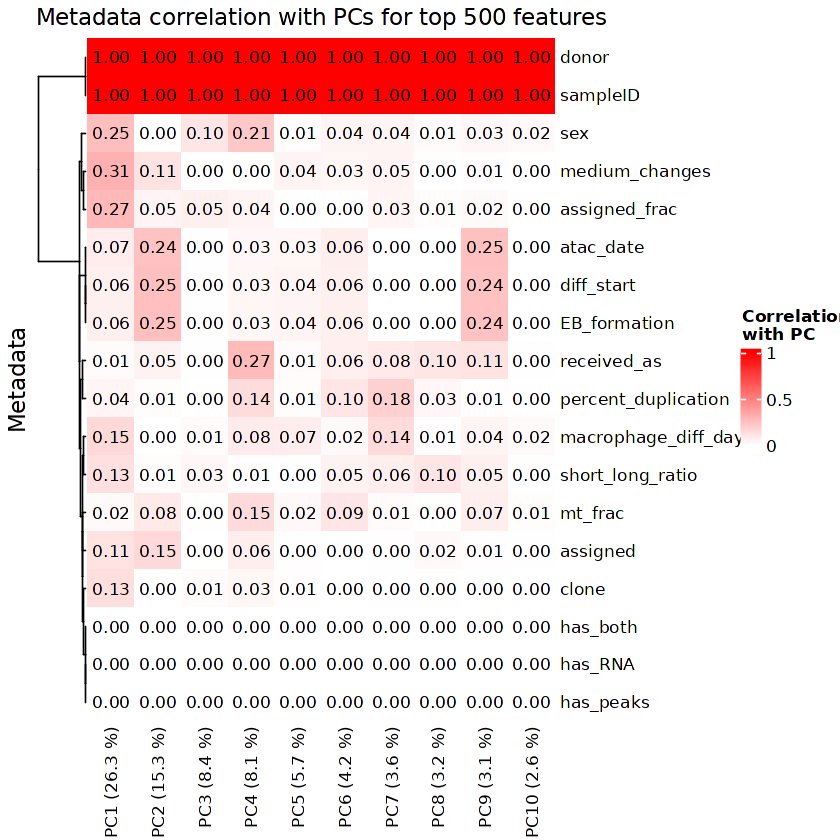

INFO [2024-01-22 15:39:59] Finished successfully. Execution time: 0.7 secs


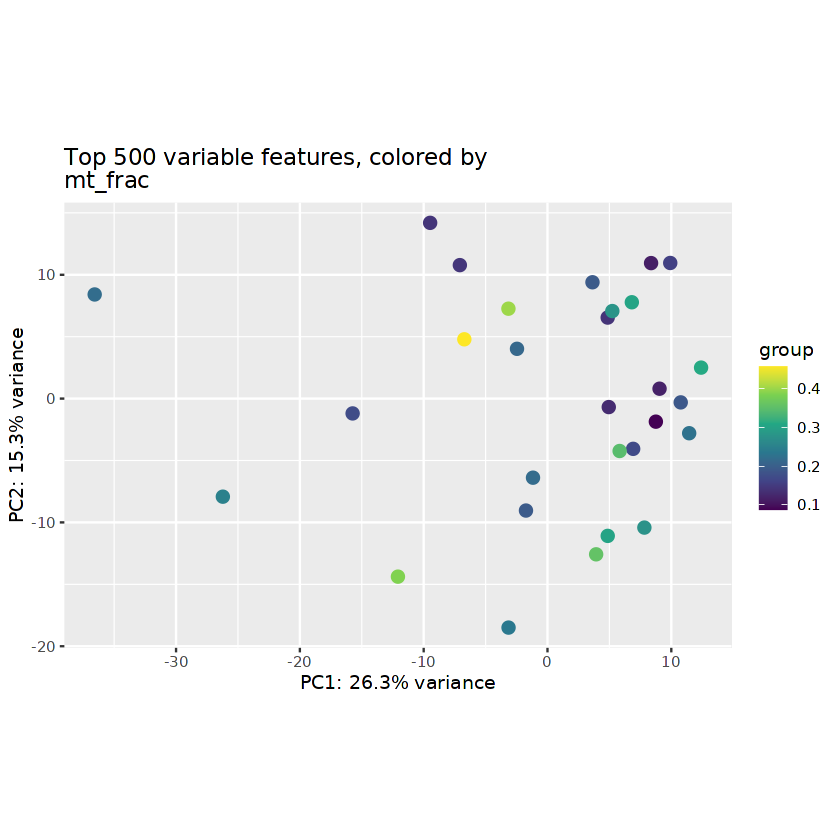

In [24]:
GRN = plotPCA_all(GRN, data = c("rna"), topn = 500, type = "normalized", plotAsPDF = FALSE,
    pages = c(2, 3, 14), forceRerun = TRUE)

In [25]:
folder_TFBS_6TFs = "https://www.embl.de/download/zaugg/GRaNIE/TFBS_selected.zip"
# Download the zip of all TFBS files. Takes too long here, not executed
# therefore

download.file(folder_TFBS_6TFs, file.path("TFBS_selected.zip"), quiet = FALSE)

unzip(file.path("TFBS_selected.zip"), overwrite = TRUE)

motifFolder = tools::file_path_as_absolute("TFBS_selected")

GRN = addTFBS(GRN, motifFolder = motifFolder, TFs = "all", filesTFBSPattern = "_TFBS",
    fileEnding = ".bed.gz", forceRerun = TRUE)

GRN = overlapPeaksAndTFBS(GRN, nCores = 1, forceRerun = TRUE)

INFO [2024-01-22 15:41:56] Checking database folder for matching files: /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/TFBS_selected
INFO [2024-01-22 15:41:56] Reading file /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/TFBS_selected/translationTable.csv
INFO [2024-01-22 15:41:56]  Finished successfully. Execution time: 0 secs
INFO [2024-01-22 15:41:56] Found 6 matching TFs: BATF3.0.B, E2F6.0.A, E2F7.0.B, EGR1.0.A, EGR2.0.A, ETV5.0.C
INFO [2024-01-22 15:41:56] Use all TF from the database folder /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/TFBS_selected
INFO [2024-01-22 15:41:56] Running the pipeline for 6 TF in total.
INFO [2024-01-22 15:41:56] Finished successfully. Execution time: 0.1 secs
INFO [2024-01-22 15:41:56] Overlap peaks and TFBS using 1 cores. This may take a while, particularly if the number of samples is large...
INFO [2024-01-22 15:41:57]  Calculating intersection for TF BATF3.0.

In [26]:
# Chromosomes to keep for peaks. This should be a vector of chromosome names
chrToKeep_peaks = c(paste0("chr", 1:22), "chrX")
GRN = filterData(GRN, minNormalizedMean_peaks = 5, minNormalizedMeanRNA = 1, chrToKeep_peaks = chrToKeep_peaks,
    maxSize_peaks = 10000, forceRerun = TRUE)

INFO [2024-01-22 15:42:21] FILTER PEAKS
INFO [2024-01-22 15:42:21]  Number of peaks before filtering : 60698
INFO [2024-01-22 15:42:21]   Filter peaks by CV: Min = 0
INFO [2024-01-22 15:42:21]   Filter peaks by mean: Min = 5
INFO [2024-01-22 15:42:21]  Number of peaks after filtering : 58934
INFO [2024-01-22 15:42:21]  Finished successfully. Execution time: 0 secs
INFO [2024-01-22 15:42:21] Filter and sort peaks by size and remain only those bigger than 20 and smaller than 10000
INFO [2024-01-22 15:42:21] Filter and sort peaks and remain only those on the following chromosomes: chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrX
INFO [2024-01-22 15:42:21]  Number of peaks before filtering: 60698
INFO [2024-01-22 15:42:21]  Number of peaks after filtering : 60698
INFO [2024-01-22 15:42:21]  Finished successfully. Execution time: 0 secs
INFO [2024-01-22 15:42:21] Collectively, filter 1764 out of 60698 peaks.
INFO

In [27]:
GRN = addConnections_TF_peak(GRN, plotDiagnosticPlots = FALSE, connectionTypes = c("expression"),
    corMethod = "pearson", forceRerun = TRUE)

INFO [2024-01-22 15:42:31] 
Real data

INFO [2024-01-22 15:42:31] Calculate TF-peak links for connection type expression
INFO [2024-01-22 15:42:31]  Correlate expression and peak counts
INFO [2024-01-22 15:42:31]   Retain 6 unique genes from TF/gene data out of 18905 (filter 18899 non-TF genes and 0 TF genes with 0 counts throughout).
INFO [2024-01-22 15:42:31]   Correlate TF/gene data for 6 unique Ensembl IDs (TFs) and peak counts for 58934 peaks.
INFO [2024-01-22 15:42:31]   Note: For subsequent steps, the same gene may be associated with multiple TF, depending on the translation table.
INFO [2024-01-22 15:42:31]   Finished successfully. Execution time: 0 secs
INFO [2024-01-22 15:42:31]  Run FDR calculations for 6 TFs for which TFBS predictions and expression data for the corresponding gene are available.
INFO [2024-01-22 15:42:31]   Compute FDR for each TF. This may take a while...
INFO [2024-01-22 15:42:32]   Finished successfully. Execution time: 0.5 secs
INFO [2024-01-22 15:42:32

INFO [2024-01-22 15:42:43] 
 Plotting for Real data
INFO [2024-01-22 15:42:43] Plotting FDR summary and curves for each TF
INFO [2024-01-22 15:42:43] TF-peak link summary for real vs background links, stratified by FDR
INFO [2024-01-22 15:42:43]  FDR = 0.001(real vs background)
INFO [2024-01-22 15:42:43]   Links total        : 1 vs 1
INFO [2024-01-22 15:42:43]   Distinct TFs total : 0 vs 2
INFO [2024-01-22 15:42:43]   Links with r>=0    : 1 vs 1
INFO [2024-01-22 15:42:43]   Distinct TFs r>=0  : 1 vs 1
INFO [2024-01-22 15:42:43]   Links with r<0     : 0 vs 1
INFO [2024-01-22 15:42:43]   Distinct TFs r<0   : -1 vs 1
INFO [2024-01-22 15:42:43]  FDR = 0.01(real vs background)
INFO [2024-01-22 15:42:43]   Links total        : 1 vs 1
INFO [2024-01-22 15:42:43]   Distinct TFs total : 0 vs 2
INFO [2024-01-22 15:42:43]   Links with r>=0    : 1 vs 1
INFO [2024-01-22 15:42:43]   Distinct TFs r>=0  : 1 vs 1
INFO [2024-01-22 15:42:43]   Links with r<0     : 0 vs 1
INFO [2024-01-22 15:42:43]   Disti

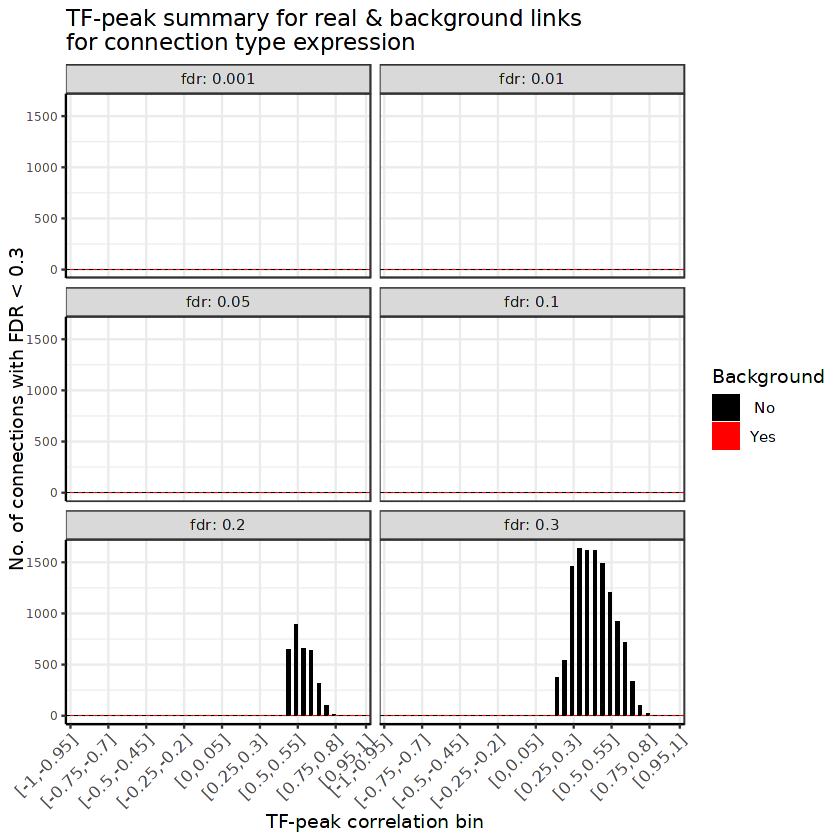

In [28]:
GRN = plotDiagnosticPlots_TFPeaks(GRN, dataType = c("real"), plotAsPDF = FALSE, pages = c(1))

In [30]:
GRN = addConnections_peak_gene(GRN, corMethod = "pearson", promoterRange = 10000,
    TADs = NULL, nCores = 1, plotDiagnosticPlots = FALSE, plotGeneTypes = list(c("all")),
    forceRerun = TRUE)

INFO [2024-01-22 15:43:52] 
Real data

INFO [2024-01-22 15:43:52] Calculate peak-gene correlations for neighborhood size 10000
INFO [2024-01-22 15:43:52] Calculate peak gene overlaps...
INFO [2024-01-22 15:43:52] Extend peaks based on user-defined extension size of 10000 up- and downstream.
INFO [2024-01-22 15:43:52]  Finished successfully. Execution time: 0.2 secs
INFO [2024-01-22 15:43:52]  Iterate through 16469 peak-gene combinations and calculate correlations using 1 cores. This may take a few minutes.
INFO [2024-01-22 15:43:59]  Finished execution using 1 cores. TOTAL RUNNING TIME: 6.5 secs

INFO [2024-01-22 15:43:59]  Finished with calculating correlations, creating final data frame and filter NA rows due to missing RNA-seq data
INFO [2024-01-22 15:43:59]  Initial number of rows: 16469
INFO [2024-01-22 15:43:59]  Finished. Final number of rows: 16416
INFO [2024-01-22 15:43:59]  Finished successfully. Execution time: 6.9 secs
INFO [2024-01-22 15:43:59] 
Permuted data

INFO [2024-0

INFO [2024-01-22 15:44:06] Plotting diagnostic plots for peak-gene correlations


Warning message:
"There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `peak_gene.distance_class = forcats::fct_explicit_na(...)`.
Caused by warning:
! `fct_explicit_na()` was deprecated in forcats 1.0.0.
ℹ Please use `fct_na_value_to_level()` instead.
ℹ The deprecated feature was likely used in the GRaNIE package.
  Please report the issue at <https://git.embl.de/grp-zaugg/GRaNIE/issues>."


INFO [2024-01-22 15:44:06]  Gene type protein_coding+lincRNA
INFO [2024-01-22 15:44:07]  Finished successfully. Execution time: 1 secs
INFO [2024-01-22 15:44:07] Finished successfully. Execution time: 1 secs


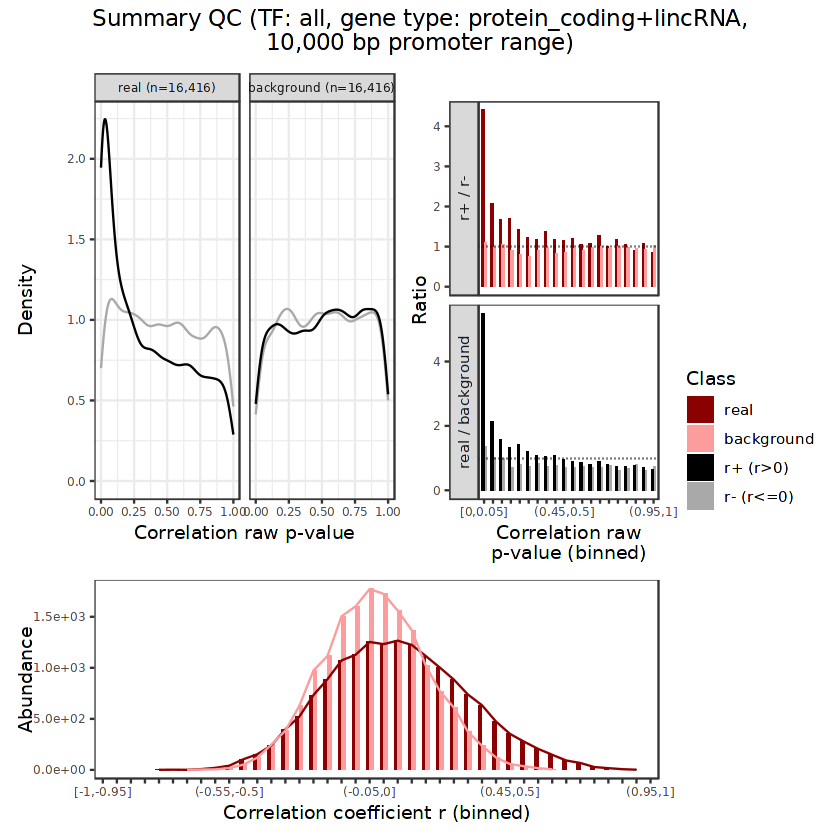

In [31]:
GRN = plotDiagnosticPlots_peakGene(GRN, gene.types = list(c("protein_coding", "lincRNA")),
    plotAsPDF = FALSE, pages = 1)

In [32]:
GRN = filterGRNAndConnectGenes(GRN, TF_peak.fdr.threshold = 0.2, peak_gene.fdr.threshold = 0.2,
    peak_gene.fdr.method = "BH", gene.types = c("protein_coding", "lincRNA"), allowMissingTFs = FALSE,
    allowMissingGenes = FALSE, forceRerun = TRUE)

INFO [2024-01-22 15:44:22] Filter GRN network
INFO [2024-01-22 15:44:22] 

Real data
INFO [2024-01-22 15:44:22] Inital number of rows left before all filtering steps: 12035
INFO [2024-01-22 15:44:22]  Filter network and retain only rows with TF-peak connections with an FDR < 0.2
INFO [2024-01-22 15:44:22]   Number of TF-peak rows before filtering TFs: 12035
INFO [2024-01-22 15:44:22]   Number of TF-peak rows after filtering TFs: 3264
INFO [2024-01-22 15:44:22] 2. Filter peak-gene connections
INFO [2024-01-22 15:44:22]  Filter genes by gene type, keep only the following gene types: protein_coding, lincRNA
INFO [2024-01-22 15:44:22]   Number of peak-gene rows before filtering by gene type: 16416
INFO [2024-01-22 15:44:22]   Number of peak-gene rows after filtering by gene type: 16328
INFO [2024-01-22 15:44:22] 3. Merging TF-peak with peak-gene connections and filter the combined table...
INFO [2024-01-22 15:44:22] Inital number of rows left before filtering steps: 3862
INFO [2024-01-22 1

In [34]:
GRN = add_TF_gene_correlation(GRN, corMethod = "pearson", nCores = 1, forceRerun = TRUE)

INFO [2024-01-22 15:45:31] Calculate correlations for TF and genes from the filtered set of connections
INFO [2024-01-22 15:45:31]  Real data
INFO [2024-01-22 15:45:31]   Iterate through 397 TF-gene combinations and (if possible) calculate correlations using 1 cores. This may take a few minutes.
INFO [2024-01-22 15:45:32]  Finished execution using 1 cores. TOTAL RUNNING TIME: 0.1 secs

INFO [2024-01-22 15:45:32]   Done. Construct the final table, this may result in an increased number of TF-gene pairs due to different TF names linked to the same Ensembl ID.
INFO [2024-01-22 15:45:32]  Permuted data
INFO [2024-01-22 15:45:32]  Nothing to do, skip.
INFO [2024-01-22 15:45:32] Finished successfully. Execution time: 0.2 secs


In [35]:
GRN_connections.all = getGRNConnections(GRN, type = "all.filtered", include_TF_gene_correlations = TRUE,
    include_geneMetadata = TRUE)

GRN_connections.all

TF.ID,TF.name,TF.ENSEMBL,peak.ID,TF_peak.r_bin,TF_peak.r,TF_peak.fdr,TF_peak.fdr_direction,TF_peak.connectionType,peak_gene.distance,⋯,gene.type,gene.mean,gene.median,gene.CV,gene.chr,gene.start,gene.end,gene.strand,TF_gene.r,TF_gene.p_raw
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>
E2F6.0.A,E2F6,ENSG00000169016,chr15:41230983-41231554,"[0.5,0.55)",0.54504,0.17502,pos,expression,145,⋯,protein_coding,2663.2580,2606.5517,0.15440,chr15,41230839,41281887,+,0.094664,0.62522577
E2F6.0.A,E2F6,ENSG00000169016,chr6:41228492-41229233,"[0.5,0.55)",0.52549,0.17502,pos,expression,154,⋯,protein_coding,114.3401,24.7586,1.46437,chr6,41228339,41238882,+,0.451954,0.01384249
E2F6.0.A,E2F6,ENSG00000169016,chr3:4979143-4979542,"[0.5,0.55)",0.54471,0.17502,pos,expression,0,⋯,protein_coding,11871.8514,10257.1724,0.40314,chr3,4979437,4985323,+,0.438897,0.01722580
E2F6.0.A,E2F6,ENSG00000169016,chr17:14297437-14297843,"[0.45,0.5)",0.48886,0.19596,pos,expression,6011,⋯,lincRNA,728.7765,709.1034,0.49152,chr17,14303854,14305505,+,0.025282,0.89642257
E2F6.0.A,E2F6,ENSG00000169016,chr6:149450784-149451256,"[0.45,0.5)",0.49930,0.19596,pos,expression,3990,⋯,protein_coding,92.0654,89.0172,0.48511,chr6,149446795,149485014,-,0.297374,0.11719752
E2F6.0.A,E2F6,ENSG00000169016,chr1:65148552-65149390,"[0.65,0.7)",0.65963,0.16661,pos,expression,1004,⋯,protein_coding,2101.7444,2110.0690,0.29965,chr1,65147549,65232145,+,0.174442,0.36544127
E2F6.0.A,E2F6,ENSG00000169016,chr3:119323830-119323967,"[0.45,0.5)",0.48699,0.19596,pos,expression,9538,⋯,lincRNA,31.7788,25.8276,0.65285,chr3,119314293,119322760,-,0.513177,0.00441462
E2F6.0.A,E2F6,ENSG00000169016,chr17:39209779-39210126,"[0.55,0.6)",0.58988,0.15876,pos,expression,415,⋯,protein_coding,18.9150,16.2759,0.76623,chr17,39210541,39225945,-,0.407851,0.02807503
E2F6.0.A,E2F6,ENSG00000169016,chr17:59619018-59620131,"[0.5,0.55)",0.51604,0.17502,pos,expression,466,⋯,lincRNA,6.4049,5.4138,0.65135,chr17,59618553,59619714,-,0.532241,0.00295906


INFO [2024-01-22 15:45:51] Generating summary. This may take a while...
INFO [2024-01-22 15:45:51] 
Real data...

INFO [2024-01-22 15:45:51] Calculate network stats for TF-peak FDR of 0.05
INFO [2024-01-22 15:45:52] Calculate network stats for TF-peak FDR of 0.1
INFO [2024-01-22 15:45:52] Calculate network stats for TF-peak FDR of 0.2
INFO [2024-01-22 15:45:53] 
Permuted data...

INFO [2024-01-22 15:45:53] Calculate network stats for TF-peak FDR of 0.05
INFO [2024-01-22 15:45:53] Calculate network stats for TF-peak FDR of 0.1
INFO [2024-01-22 15:45:54] Calculate network stats for TF-peak FDR of 0.2
INFO [2024-01-22 15:45:54] Finished successfully. Execution time: 2.8 secs
INFO [2024-01-22 15:45:54] Plotting connection summary
INFO [2024-01-22 15:45:54]  Finished successfully. Execution time: 0.2 secs
INFO [2024-01-22 15:45:54] Finished successfully. Execution time: 0.2 secs


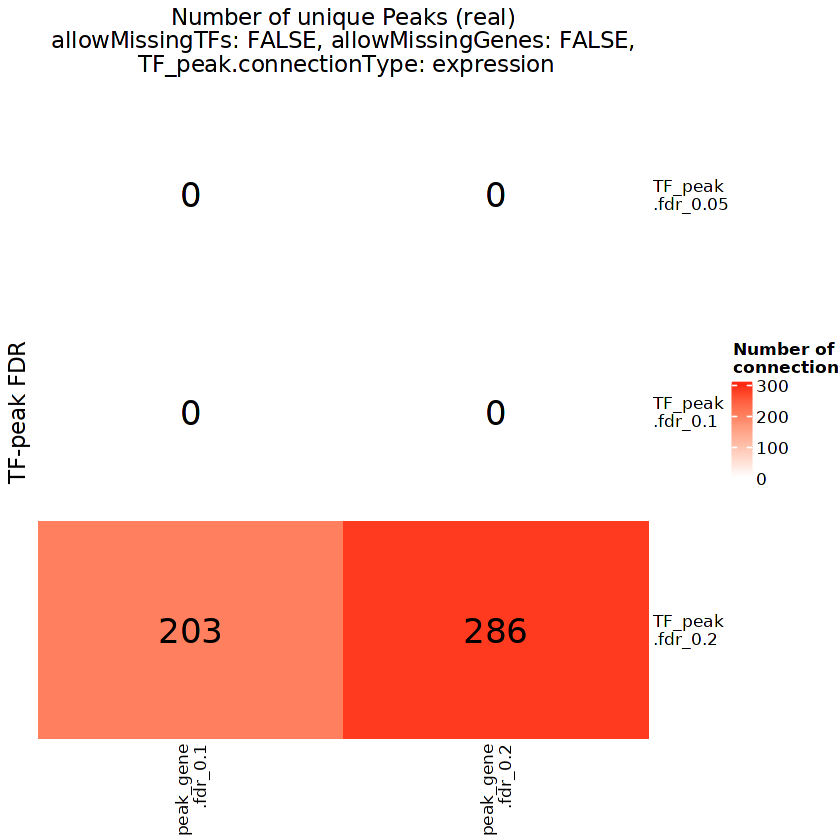

In [36]:
GRN = generateStatsSummary(GRN, TF_peak.fdr = c(0.05, 0.1, 0.2), TF_peak.connectionTypes = "all",
    peak_gene.fdr = c(0.1, 0.2), peak_gene.r_range = c(0, 1), allowMissingGenes = c(FALSE,
        TRUE), allowMissingTFs = c(FALSE), gene.types = c("protein_coding", "lincRNA"),
    forceRerun = TRUE)


GRN = plot_stats_connectionSummary(GRN, type = "heatmap", plotAsPDF = FALSE, pages = 3)

In [37]:
GRN = build_eGRN_graph(GRN, forceRerun = TRUE)

INFO [2024-01-22 15:46:00] Building TF-peak-gene graph...
INFO [2024-01-22 15:46:01]  Graph summary:
INFO [2024-01-22 15:46:01]   Nodes (vertices): 581
INFO [2024-01-22 15:46:01]   Edges: 694
INFO [2024-01-22 15:46:01]  Done. Graphs are saved in GRN@graph
INFO [2024-01-22 15:46:01] Building TF-gene graph...
INFO [2024-01-22 15:46:01]  Graph summary:
INFO [2024-01-22 15:46:01]   Nodes (vertices): 295
INFO [2024-01-22 15:46:01]   Edges: 397
INFO [2024-01-22 15:46:01]  Done. Graphs are saved in GRN@graph
INFO [2024-01-22 15:46:01]  Finished successfully. Execution time: 0.1 secs


In [38]:
GRN

GRN object from package GRaNIE (created with version 1.6.1)
Data summary:
 Peaks (filtered, all): 58934, 60698
 Genes (filtered, all): 18905, 18972
 Shared samples: 29
 TFs (with expression data): 6
Parameters:
 Output directory:  /mnt/c/Users/nourisa/Documents/testProjs/ongoing/op_multiomics_grn/notebooks/ 
Provided metadata:
  name :  Macrophages_infected_primed 
  file_peaks :  https://www.embl.de/download/zaugg/GRaNIE/countsATAC.filtered.tsv.gz 
  file_rna :  https://www.embl.de/download/zaugg/GRaNIE/countsRNA.filtered.tsv.gz 
  file_sampleMetadata :  https://www.embl.de/download/zaugg/GRaNIE/sampleMetadata.tsv.gz 
  genomeAssembly :  hg38 
Connections:
 TF-peak links (12035 with FDR < 0.3)
 peak-gene links (16416 with 10000 bp promoter range)
 TF-peak-gene links (417 with TF-peak FDR 0.19919 and peak-gene FDR 0.19976)
Network-related:
 eGRN network:
   TF-gene eGRN: 295 nodes and 397 edges
   TF-peak-gene eGRN: 581 nodes and 694 edges
 Communities (TF-gene):
  None found
 Enrichme